In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\Users\\ACER\\OneDrive\\Desktop\\PythonDesk\\CaseStudy\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project')
##pd.options.display.float_format = '{:.0f}'.format

import scipy.stats as stats
import time

## E-Commerce Analytics Project

In [4]:
cust_df = pd.read_csv('CUSTOMERS.csv')
location_df = pd.read_csv('GEO_LOCATION.csv')
order_items_df = pd.read_csv('ORDER_ITEMS.csv')
order_pmnts_df = pd.read_csv('ORDER_PAYMENTS.csv')
rating_df = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
orders_df = pd.read_csv('ORDERS.csv')
products_df = pd.read_csv('PRODUCTS.csv')
sellers_df = pd.read_csv('SELLERS.csv')

In [3]:
cust_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh


In [4]:
location_df.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh


In [43]:
order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.0,17.87


In [6]:
order_pmnts_df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [7]:
rating_df.head(3)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36


In [8]:
orders_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00


In [9]:
products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [10]:
sellers_df.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh


## EDA: Exploratory Data Analysis - CUSTOMER DATA

In [11]:
## Customer Data
cust_df.shape

(99441, 5)

In [12]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
## Datatypes looks fine for each variable

In [13]:
cust_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh


In [14]:
cust_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0


In [15]:
cust_df.describe(include='object').T

,count,unique,top,freq
customer_id,99441,99441,06b8999e2fba1a1fbc88172c00ba8bc7,1
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17
customer_city,99441,4119,Akkarampalle,15540
customer_state,99441,20,Andhra Pradesh,60688


In [16]:
cust_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
## NO MISSING VALUES

In [18]:
##Check DUPLICATES
print(cust_df.duplicated().sum(), 'duplicates found')

0 duplicates found


## EDA - GEO-Location data

In [21]:
##geo-locaion
location_df.shape

(19015, 5)

In [22]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [23]:
location_df.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh


In [36]:
## Datatypes looks fine for each columns

In [24]:
location_df.describe().T

,count,mean,std,min,25%,50%,75%,max
geolocation_zip_code_prefix,19015.0,42711.591901,30905.051745,1001.000000,12721.500000,38240.000000,70656.500000,99990.000000
geolocation_lat,19015.0,-19.062087,7.319402,-36.605374,-23.564386,-22.429252,-15.615448,42.184003
geolocation_lng,19015.0,-46.058008,5.380751,-72.927296,-49.000445,-46.632544,-43.255324,121.105394


In [38]:
## Negative values are present in two variables

In [25]:
location_df.describe(include='object').T

,count,unique,top,freq
geolocation_city,19015,3809,Akkarampalle,5889
geolocation_state,19015,20,Andhra Pradesh,11218


In [40]:
## Top city being Akkarampalle
## Top state is Andhra Pradesh

In [26]:
## Check missing values
location_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [27]:
## Check Duplicates
print(location_df.duplicated().sum(), 'duplicates found')

0 duplicates found


## EDA - ORDER_ITEMS

In [169]:
order_items_df.shape

(112650, 7)

In [170]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [171]:
order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.0,17.87


In [31]:
## shipping_limit_date variable has to be changed to date datatype
## Rest all variable datatypes are fine

In [5]:
## covert to datetime - shipping_limit_date
order_items_df.shipping_limit_date = pd.to_datetime(order_items_df.shipping_limit_date)

In [6]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [49]:
order_items_df.describe().drop(columns=['shipping_limit_date']).T

,count,mean,min,25%,50%,75%,max,std
order_item_id,112650.0,1.197834,1.00,1.00,1.00,1.00,21.00,0.705124
price,112650.0,120.653739,0.85,39.90,74.99,134.90,6735.00,183.633928
freight_value,112650.0,19.990320,0.00,13.08,16.26,21.15,409.68,15.806405


In [50]:
order_items_df.describe(include='object').T

,count,unique,top,freq
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033


In [51]:
## Product id 'aca2eb7d00ea1a7b8ebd4e68314663af' is most frequently ordered
## Top Seller id is '6560211a19b47992c3666cc44a7e94c0'

In [52]:
## Check missing values
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [53]:
## No NULL values

In [54]:
## Check duplicates
print(order_items_df.duplicated().sum(), 'duplicates found')

0 duplicates found


In [ ]:
## Checking OUTLIERS

In [7]:
num_cols = order_items_df.select_dtypes('number').drop(columns=['order_item_id'])

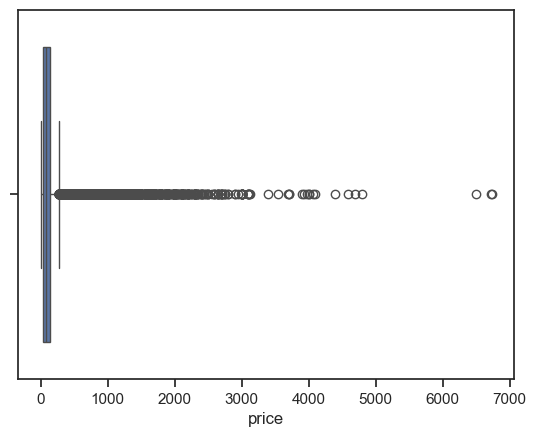

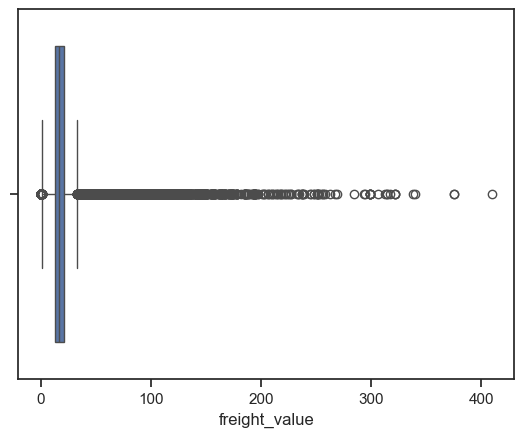

In [8]:
for i in num_cols:
    sns.boxplot(data = num_cols, x=i)
    plt.show()

In [193]:
## OUTLIER TREATMENT

In [9]:
for i in num_cols.columns:
    Q1 = num_cols[i].quantile(0.25)
    Q3 = num_cols[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_ = Q1 - (1.5*IQR)
    upper_ = Q3 + (1.5*IQR)
    num_cols[i] = num_cols[i].clip(lower = lower_, upper=upper_)

In [10]:
num_cols

,price,freight_value
0,58.90,13.290
1,239.90,19.930
2,199.00,17.870
3,12.99,12.790
4,199.90,18.140
...,...,...
112645,277.40,33.255
112646,277.40,33.255
112647,99.90,16.950
112648,55.99,8.720


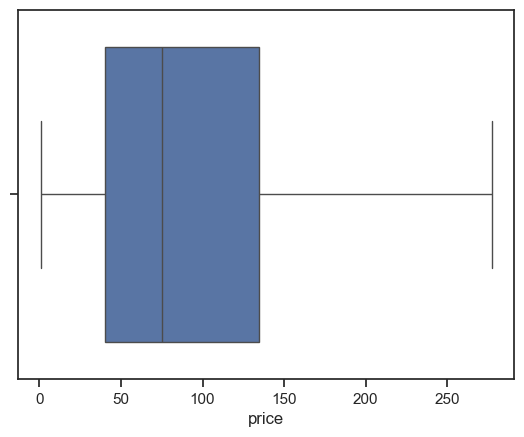

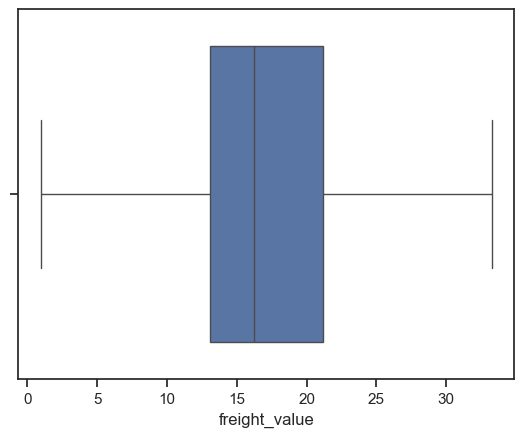

In [11]:
## Checking ouliers again
for i in num_cols:
    sns.boxplot(data = num_cols, x=i)
    plt.show()

## EDA - Order Payments

In [153]:
order_pmnts_df.shape

(103886, 5)

In [154]:
order_pmnts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [155]:
order_pmnts_df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [156]:
## Datatypes looks fine

In [157]:
order_pmnts_df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


In [60]:
## Payments installment ranges from 1 to max of 24 installments
## Highest payment value is more than 13000/- and lowest being 56/-

In [158]:
order_pmnts_df.describe(include='object').T

,count,unique,top,freq
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29
payment_type,103886,5,credit_card,76795


In [62]:
## Credit card is top most payment type with more tha 75000 transactions
## Top order has almost 29 transactions

In [159]:
## Check missing values
order_pmnts_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [160]:
## No missing values

In [161]:
## Check duplicates
print(order_pmnts_df.duplicated().sum(), 'duplicates found')

0 duplicates found


In [162]:
## NULL duplicates

## EDA - Reviews and Ratings

In [66]:
rating_df.shape

(100000, 5)

In [67]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [68]:
rating_df.head(3)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36


In [ ]:
## Dates are cuurently stored as OBJECT. Needs to be corrected

In [12]:
rating_df.review_creation_date = pd.to_datetime(rating_df.review_creation_date)
rating_df.review_answer_timestamp = pd.to_datetime(rating_df.review_answer_timestamp)

In [13]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_creation_date     100000 non-null  datetime64[ns]
 4   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [74]:
rating_df.describe().drop(columns=['review_creation_date','review_answer_timestamp']).T

,count,mean,min,25%,50%,75%,max,std
review_score,100000.0,4.07089,1.0,4.0,5.0,5.0,5.0,1.359663


In [75]:
rating_df.describe(include='object').T

,count,unique,top,freq
review_id,100000,99173,2172867fd5b1a55f98fe4608e1547b4b,3
order_id,100000,99441,03c939fd7fd3b38f8485a0f95798f1f6,3


In [76]:
## Check missing values
rating_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [77]:
## No null values present

In [78]:
## Check Duplicates
print(rating_df.duplicated().sum(), 'duplicates found')

0 duplicates found


## EDA - Orders

In [79]:
orders_df.shape

(99441, 8)

In [80]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [81]:
orders_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00


In [82]:
orders_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [14]:
## Date varibles needs to be corrected to Ddatetime datatypes
dates = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for i in dates:
    orders_df[i] = pd.to_datetime(orders_df[i])

In [15]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [87]:
orders_df.describe().T

,count,mean,min,25%,50%,75%,max
order_purchase_timestamp,99441,2017-12-31 08:42:43.256403200,2016-09-04 21:15:00,2017-09-12 14:46:00,2018-01-18 23:04:00,2018-05-04 15:42:00,2018-10-17 17:30:00
order_approved_at,99281,2017-12-31 18:34:57.504054016,2016-09-15 12:16:00,2017-09-12 23:24:00,2018-01-19 11:36:00,2018-05-04 20:35:00,2018-09-03 17:40:00
order_delivered_carrier_date,97658,2018-01-04 21:49:25.250773248,2016-10-08 10:34:00,2017-09-15 22:28:00,2018-01-24 16:10:30,2018-05-08 13:37:45,2018-09-11 19:48:00
order_delivered_customer_date,96476,2018-01-14 12:08:45.733239552,2016-10-11 13:46:00,2017-09-25 22:06:45,2018-02-02 19:27:30,2018-05-15 22:48:00,2018-10-17 13:22:00
order_estimated_delivery_date,99441,2018-01-24 03:08:37.730111232,2016-09-30 00:00:00,2017-10-03 00:00:00,2018-02-15 00:00:00,2018-05-25 00:00:00,2018-11-12 00:00:00


In [89]:
orders_df.describe(include = 'object').T

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478


In [90]:
## Order Staus for most of the orders are DELIVERED successfuly

In [16]:
## CHeck missing values
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [94]:
## Contains missing values
## Check % of missing values
orders_df.isnull().sum()/len(orders_df)*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [17]:
## Since the variables with missing values are less than 5%, we will drop those.
orders_df.dropna(subset = ['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'], inplace=True)

In [18]:
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [108]:
## Check Duplicates
orders_df.duplicated().sum()

0

In [109]:
## No Duplicates found

## EDA - Products

In [110]:
products_df.shape

(32951, 9)

In [111]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [112]:
products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [113]:
## All variables have correct datatypes

In [114]:
products_df.product_category_name.unique()

array(['Perfumery', 'Art', 'Sports_Leisure', 'Baby', 'Housewares',
       'Musical_Instruments', 'Cool_Stuff', 'Furniture_Decor',
       'Home_Appliances', 'Toys', 'Bed_Bath_Table',
       'Construction_Tools_Safety', 'Computers_Accessories',
       'Health_Beauty', 'Luggage_Accessories', 'Garden_Tools',
       'Office_Furniture', 'Auto', 'Electronics', 'Fashion_Shoes',
       'Telephony', 'Stationery', 'Fashion_Bags_Accessories', 'Computers',
       'Home_Construction', 'Watches_Gifts',
       'Construction_Tools_Construction', 'Pet_Shop', 'Small_Appliances',
       'Agro_Industry_And_Commerce', nan, 'Furniture_Living_Room',
       'Signaling_And_Security', 'Air_Conditioning', 'Consoles_Games',
       'Books_General_Interest', 'Costruction_Tools_Tools',
       'Fashion_Underwear_Beach', 'Fashion_Male_Clothing',
       'Kitchen_Dining_Laundry_Garden_Furniture',
       'Industry_Commerce_And_Business', 'Fixed_Telephony',
       'Construction_Tools_Lights', 'Books_Technical',
       'Hom

In [115]:
products_df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


In [116]:
products_df.describe(include='object').T

,count,unique,top,freq
product_id,32951,32951,1e9e8ef04dbcff4541ed26657ea517e5,1
product_category_name,32328,71,Bed_Bath_Table,3029


In [117]:
## In product caategory name, Bed_Bath_Table has highest frequency

In [19]:
## CHeck NULL values
products_df.isnull().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [20]:
## Checking % of null values
products_df.isnull().sum()/len(products_df)*100

product_id                    0.000000
product_category_name         1.890686
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [21]:
## The missing values are less than 5%, lets mpute them this time and not drop them:
for i in products_df.columns:
    if products_df[i].dtype == 'object':
        products_df[i] = products_df[i].fillna(products_df[i].mode()[0])
    else:
        products_df[i] = products_df[i].fillna(products_df[i].mean())

In [22]:
## Checking again
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [125]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [126]:
## Checking Duplicates
products_df.duplicated().sum()

0

In [127]:
## NO DUPLICATES PRESENT

## EDA - SELLERS

In [128]:
sellers_df.shape

(3095, 4)

In [129]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [130]:
sellers_df.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh


In [131]:
## Datatypes are correct

In [132]:
sellers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
seller_zip_code_prefix,3095.0,32174.79063,32656.670163,1001.0,7084.0,14940.0,61780.0,99730.0


In [133]:
sellers_df.describe(include='object').T

,count,unique,top,freq
seller_id,3095,3095,3442f8959a84dea7ee197c632cb2df15,1
seller_city,3038,534,Akkarampalle,699
seller_state,3038,19,Andhra Pradesh,2060


In [134]:
## In seller city, Akkarampalle has the highest frequency
## In seller state, Andhra Pradesh has the highest frequency

In [135]:
sellers_df.seller_city.unique()

array(['Alwal', 'Badepalle', 'Akkarampalle', 'Koratla',
       'Vitthal Udyognagar INA', 'Anakapalle', 'Gaurella', 'Peralasseri',
       'Kandla', 'Sarkhej-Okaf', 'Konnur', 'Eddumailaram',
       'Dharamjaigarh', 'Machilipatnam', 'Gho Manhasan', 'Farooqnagar',
       'Kosamba', 'Anantapur', 'Renigunta', 'Adoni', 'Bawani Khera',
       'Harpanahalli', 'Barshi', 'Mancherial', 'Bestavaripeta',
       'Chunchupalle', 'Daitari', 'Chinnachowk', 'Bellampalle', 'Eluru',
       'Pudupalayam', 'Bheemavaram', 'Nagari', 'Nagarkurnool', 'Pithora',
       'Ziro', 'Guruvayoor', 'Ponnur', 'Sirsilla', 'Champa',
       'Khajoori Khas', 'Guntur', 'Tarsali', 'Madanapalle', 'Bapatla',
       'Khairagarh', 'Kamareddy', 'Amadalavalasa', 'Amreli',
       'Duru-Verinag', 'Durg', 'Alnavar', 'Bowali', 'Naspur', 'Pahalgam',
       'Bade Bacheli', 'Samalkota', 'Lormi', 'Chilla Saroda Bangar',
       'Pitapuram', 'Sikka', 'Muvattupuzha', 'Singapur', 'Nellimaria',
       'Pooth Khurd', 'Kapas Hera', 'Chirala', 'Wana

In [136]:
sellers_df.seller_state.unique()

array(['Andhra Pradesh', 'Gujarat', 'Chhattisgarh', 'Kerala', 'Karnataka',
       'Jammu & Kashmir', 'Haryana', 'Maharashtra', 'Orissa',
       'Tamil Nadu', 'Arunachal Pradesh', 'Delhi', 'West Bengal',
       'Madhya Pradesh', 'Rajasthan', 'Himachal Pradesh', 'Punjab',
       'Uttar Pradesh', nan, 'Uttaranchal'], dtype=object)

In [137]:
## Checking NULL values

In [141]:
sellers_df.isnull().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [23]:
## Has NULL values
## %Checking % of them
sellers_df.isnull().sum()/sellers_df.shape[0]*100

seller_id                 0.00000
seller_zip_code_prefix    0.00000
seller_city               1.84168
seller_state              1.84168
dtype: float64

In [24]:
## Lets impute them with mode()
for i in sellers_df.select_dtypes(exclude='int').columns:
    sellers_df[i] = sellers_df[i].fillna(sellers_df[i].mode()[0])

In [25]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [148]:
## No missing values now

In [149]:
## Check duplicates
sellers_df.duplicated().sum()

0

In [150]:
## No duplicates present

## Merging all dataframes into one.

In [27]:
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13


In [28]:
order_pmnts_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [26]:
## ORDER and ORDER_ITEMS
tmp = pd.merge(left=orders_df, right=order_pmnts_df, on = 'order_id')

In [29]:
tmp.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,3,voucher,1,2.00


In [30]:
rating_df.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00


In [32]:
## merging tmp with order_review and rating
tmp = pd.merge(left=tmp, right=rating_df, on = 'order_id')

In [35]:
##merging tmp with order_items
tmp = pd.merge(left = tmp, right = order_items_df, how = 'left', on = 'order_id')

In [36]:
## merging tmp with seller_df
tmp = pd.merge(left = tmp, right=sellers_df, how = 'left', on = 'seller_id')

In [37]:
## merging tmp with product df
tmp = pd.merge(left = tmp, right = products_df, how = 'left', on = 'product_id')

In [38]:
tmp.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,credit_card,...,Chhuikhadan,Chhattisgarh,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,3,voucher,...,Chhuikhadan,Chhattisgarh,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [39]:
## merging tmp with customrs df
tmp = pd.merge(left = tmp, right = cust_df, how = 'left', on = 'customer_id')

In [42]:
ecomm_df = tmp

In [44]:
del tmp

In [47]:
ecomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115711 entries, 0 to 115710
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115711 non-null  object        
 1   customer_id                    115711 non-null  object        
 2   order_status                   115711 non-null  object        
 3   order_purchase_timestamp       115711 non-null  datetime64[ns]
 4   order_approved_at              115711 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115711 non-null  datetime64[ns]
 6   order_delivered_customer_date  115711 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115711 non-null  datetime64[ns]
 8   payment_sequential             115711 non-null  int64         
 9   payment_type                   115711 non-null  object        
 10  payment_installments           115711 non-null  int64         
 11  

In [48]:
ecomm_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,credit_card,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,3,voucher,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh


In [49]:
## deleteing unnecessary variable from data
ecomm_df.drop(columns=[ 'product_name_lenght','product_description_lenght', 'product_weight_g',
        'product_length_cm', 'product_height_cm', 'product_width_cm','seller_zip_code_prefix','order_approved_at',
        'order_delivered_carrier_date','order_estimated_delivery_date','order_delivered_customer_date','shipping_limit_date'
        ,'payment_sequential','review_creation_date','review_answer_timestamp' ,'payment_installments'], inplace=True)

In [50]:
ecomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115711 entries, 0 to 115710
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  115711 non-null  object        
 1   customer_id               115711 non-null  object        
 2   order_status              115711 non-null  object        
 3   order_purchase_timestamp  115711 non-null  datetime64[ns]
 4   payment_type              115711 non-null  object        
 5   payment_value             115711 non-null  float64       
 6   review_id                 115711 non-null  object        
 7   review_score              115711 non-null  int64         
 8   order_item_id             115711 non-null  int64         
 9   product_id                115711 non-null  object        
 10  seller_id                 115711 non-null  object        
 11  price                     115711 non-null  float64       
 12  fr

In [51]:
## checking for duplicates
ecomm_df.duplicated().sum()

678

In [52]:
ecomm_df.drop_duplicates(inplace=True)

In [53]:
ecomm_df.duplicated().sum()

0

## Questions --

In [163]:
## a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, 
##    Total sellers, Total locations, Total channels, Total payment methods etc…)

In [54]:
print('Total Revenue: ',ecomm_df.payment_value.sum())
print('Total Quantity: ',ecomm_df.order_item_id.count())
print('Total Products: ',ecomm_df.product_id.nunique())
print('Total categories: ',ecomm_df.product_category_name.nunique())
print('Total Sellers: ',ecomm_df.seller_id.nunique())
print('Total Locations: ',ecomm_df.customer_zip_code_prefix.nunique())
print('Total payment methods: ',ecomm_df.payment_type.nunique()) 

Total Revenue:  19857853.56
Total Quantity:  115033
Total Products:  32210
Total categories:  71
Total Sellers:  2970
Total Locations:  14889
Total payment methods:  4


In [ ]:
## b. Understanding how many new customers acquired every month

In [66]:
## new column to be added as 'mon' and 'year'
ecomm_df['month'] = ecomm_df['order_purchase_timestamp'].dt.month
ecomm_df['year'] = ecomm_df['order_purchase_timestamp'].dt.year

In [68]:
ecomm_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,review_id,review_score,order_item_id,product_id,...,seller_city,seller_state,product_category_name,product_photos_qty,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Chhuikhadan,Chhattisgarh,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,voucher,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Chhuikhadan,Chhattisgarh,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017


In [77]:
## fetching all unique customer and droping duplicates
unique_cust = ecomm_df.drop_duplicates(subset = ['customer_unique_id'], keep = 'first')

In [83]:
unique_cust.groupby(by=['year','month'])['customer_unique_id'].count().reset_index().rename(columns={'customer_unique_id':'new_customers'})

,year,month,new_customers
0,2016,10,261
1,2016,12,1
2,2017,1,694
3,2017,2,1596
4,2017,3,2468
5,2017,4,2220
6,2017,5,3403
7,2017,6,2995
8,2017,7,3714
9,2017,8,4014


In [84]:
## c. Understand the retention of customers on month on month basis

In [88]:
orders_df['Year_month'] = orders_df.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))

In [89]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02


In [90]:
#merging customers and orders data
cust_orders = pd.merge(cust_df , orders_df , how = 'left' , on= 'customer_id')

In [93]:
cust_month = cust_orders.loc[:, ['customer_unique_id', 'Year_month']] 

In [96]:
cust_month.duplicated().sum()

1310

In [97]:
cust_month.drop_duplicates(subset='customer_unique_id' , inplace= True)

In [101]:
cust_monthly_cnt = cust_month.groupby('Year_month')[['customer_unique_id']].count().reset_index().rename(columns={'customer_unique_id':'cust_count'})

In [102]:
cust_monthly_cnt

,Year_month,cust_count
0,2016-09,1
1,2016-10,261
2,2017-01,700
3,2017-02,1591
4,2017-03,2464
5,2017-04,2220
6,2017-05,3385
7,2017-06,2998
8,2017-07,3718
9,2017-08,4011


In [103]:
new_cust_monthly = cust_orders.groupby('Year_month')[['customer_unique_id']].count()

In [104]:
new_cust_monthly

,customer_unique_id
Year_month,
2016-09,1
2016-10,270
2016-12,1
2017-01,748
2017-02,1641
2017-03,2546
2017-04,2303
2017-05,3545
2017-06,3135


In [105]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")

In [108]:
retented_cust_monthly['retented_cust'] = retented_cust_monthly.customer_unique_id - retented_cust_monthly.cust_count

In [109]:
retented_cust_monthly

,Year_month,customer_unique_id,cust_count,retented_cust
0,2016-09,1,1.0,0.0
1,2016-10,270,261.0,9.0
2,2016-12,1,NaN,NaN
3,2017-01,748,700.0,48.0
4,2017-02,1641,1591.0,50.0
5,2017-03,2546,2464.0,82.0
6,2017-04,2303,2220.0,83.0
7,2017-05,3545,3385.0,160.0
8,2017-06,3135,2998.0,137.0
9,2017-07,3872,3718.0,154.0


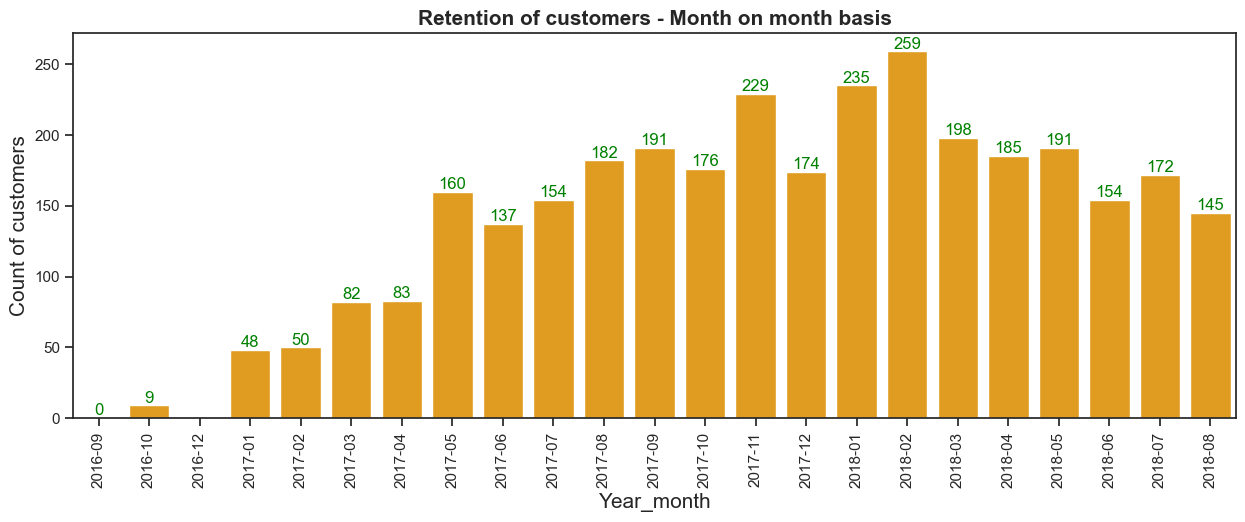

In [116]:
plt.figure(figsize=(15,5))
rbar = sns.barplot(data = retented_cust_monthly, x='Year_month', y='retented_cust', color='orange')
rbar.bar_label(container=rbar.containers[0], label_type='edge', color='green')
plt.title('Retention of customers - Month on month basis', fontweight='bold',fontsize=15)
plt.ylabel('Count of customers',fontsize=15)
plt.xlabel('Year_month',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
## d. How the revenues from existing/new customers on month on month basis

In [122]:
month_rev = ecomm_df.groupby(by=['year','month']).payment_value.sum().reset_index().rename(columns={'payment_value':'revenue'})
month_rev

,year,month,revenue
0,2016,10,63430.61
1,2016,12,19.62
2,2017,1,177727.55
3,2017,2,325344.26
4,2017,3,508554.31
5,2017,4,456738.20
6,2017,5,705406.67
7,2017,6,589599.16
8,2017,7,717703.85
9,2017,8,849824.47


In [125]:
##combining month and year as one column for visualisation purpose
month_rev['yr_mon'] = month_rev['year'].astype(str) +'-'+ month_rev.month.astype(str)

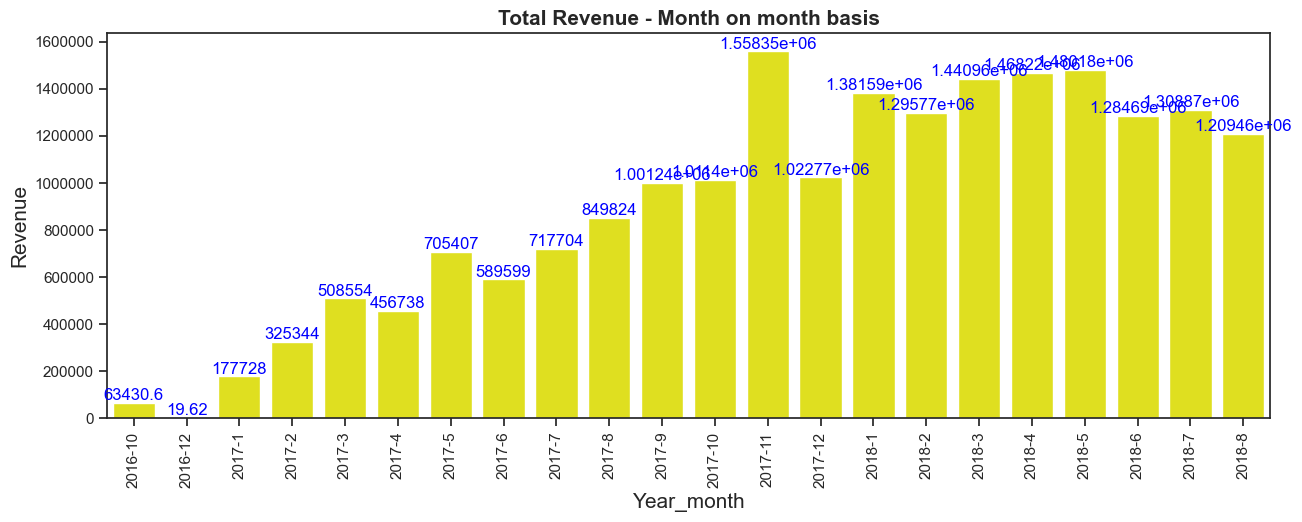

In [128]:
plt.figure(figsize=(15,5))
rvbar = sns.barplot(data = month_rev, x='yr_mon', y='revenue', color='yellow')
rvbar.bar_label(container=rvbar.containers[0], label_type='edge', color='blue')
plt.title('Total Revenue - Month on month basis', fontweight='bold',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.xlabel('Year_month',fontsize=15)
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [129]:
ecomm_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,review_id,review_score,order_item_id,product_id,...,seller_city,seller_state,product_category_name,product_photos_qty,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Chhuikhadan,Chhattisgarh,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,voucher,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Chhuikhadan,Chhattisgarh,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017


In [135]:
##Sales by Category
ecomm_df.groupby('product_category_name').payment_value.sum().reset_index().rename(columns={'payment_value':'Total_Sales'})

,product_category_name,Total_Sales
0,Agro_Industry_And_Commerce,115613.84
1,Air_Conditioning,88849.72
2,Art,28498.45
3,Arts_And_Craftmanship,2326.17
4,Audio,60233.42
...,...,...
66,Stationery,308821.35
67,Tablets_Printing_Image,10042.93
68,Telephony,469285.14
69,Toys,603940.36


In [142]:
## Sales by location - State
ecomm_df.groupby('customer_state').payment_value.sum().reset_index().rename(columns={'payment_value':'Total_Sales'}).sort_values('Total_Sales', ascending=False)

,customer_state,Total_Sales
0,Andhra Pradesh,11814189.91
5,Gujarat,1572549.09
2,Chhattisgarh,1283551.19
9,Karnataka,777725.65
3,Delhi,714744.10
11,Madhya Pradesh,591555.72
16,Tamil Nadu,456630.48
6,Haryana,448951.04
12,Maharashtra,420439.71
8,Jammu & Kashmir,329852.42


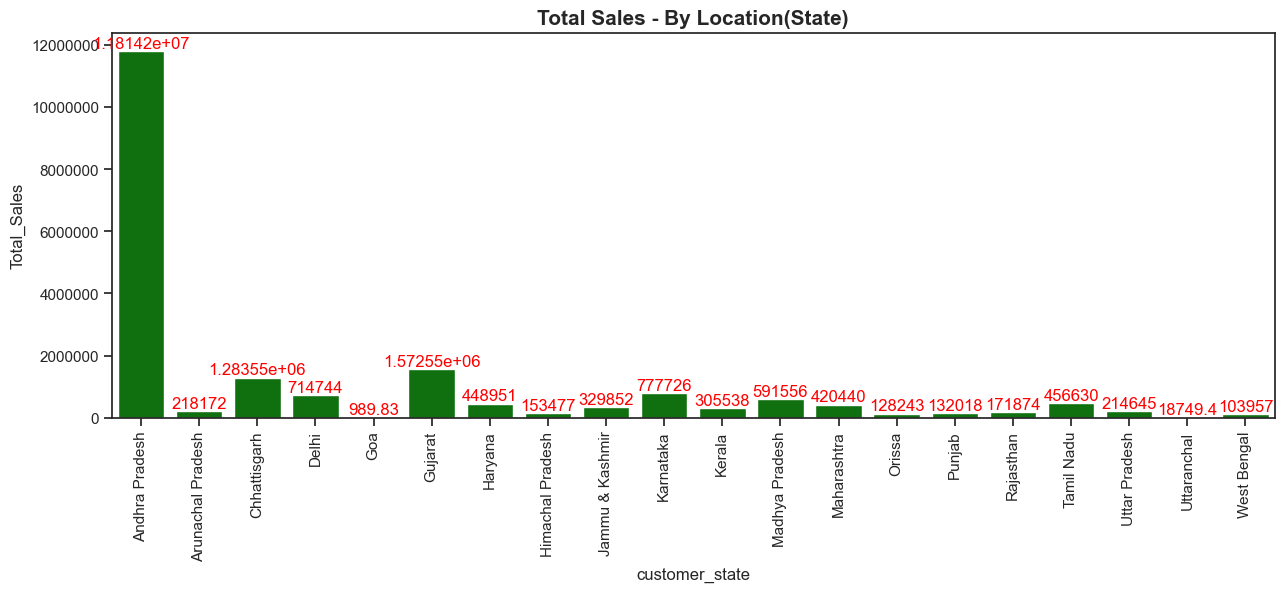

In [138]:
sales_state = ecomm_df.groupby('customer_state').payment_value.sum().reset_index().rename(columns={'payment_value':'Total_Sales'})
plt.figure(figsize=(15,5))
rvbar = sns.barplot(data = sales_state, x='customer_state', y='Total_Sales', color='Green')
rvbar.bar_label(container=rvbar.containers[0], label_type='edge', color='Red')
plt.title('Total Sales - By Location(State)', fontweight='bold',fontsize=15)
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.show()

In [141]:
## Sales by location - City
ecomm_df.groupby('customer_city').payment_value.sum().reset_index().rename(columns={'payment_value':'Total_Sales'}).sort_values('Total_Sales', ascending=False)

,customer_city,Total_Sales
55,Akkarampalle,2781139.46
282,Badepalle,1524447.76
148,Anantapur,492499.52
1091,Eddumailaram,422643.14
142,Anakapalle,323908.53
...,...,...
2569,Nagojanahalli,24.23
2849,Panihati,24.09
189,Arimalam,22.58
2458,Moonak,20.70


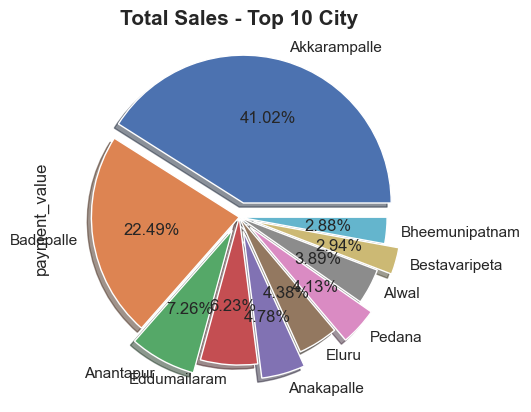

In [193]:
sales_city_top10 = ecomm_df.groupby('customer_city').payment_value.sum().sort_values(ascending=False).head(10)
#plt.figure(figsize=(15,5))
sales_city_top10.plot(kind='pie',autopct='%1.2f%%', explode=[0.1,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.1,0.0], shadow=True)
plt.title('Total Sales - Top 10 City', fontweight='bold',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [163]:
## Sales by Month
ecomm_df.groupby(by=['year','month']).payment_value.sum().reset_index().rename(columns={'payment_value':'revenue'})

,year,month,revenue
0,2016,10,63430.61
1,2016,12,19.62
2,2017,1,177727.55
3,2017,2,325344.26
4,2017,3,508554.31
5,2017,4,456738.20
6,2017,5,705406.67
7,2017,6,589599.16
8,2017,7,717703.85
9,2017,8,849824.47


In [180]:
## Sales by Week
## creating new column as year-weeknum
ecomm_df['yr-week'] = ecomm_df.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x, format= '%Y-%V'))
sales_week_top10 = ecomm_df.groupby('yr-week').payment_value.sum().reset_index().rename(columns={'payment_value':'Total_Sales'}).sort_values('Total_Sales', ascending=False).head(10)

In [181]:
sales_week_top10

,yr-week,Total_Sales
49,2017-47,654129.96
73,2018-19,439003.44
86,2018-32,427849.69
50,2017-48,397536.98
85,2018-31,389549.18
74,2018-20,386218.78
63,2018-09,377759.32
70,2018-16,368905.13
56,2018-02,365720.66
84,2018-30,357204.86


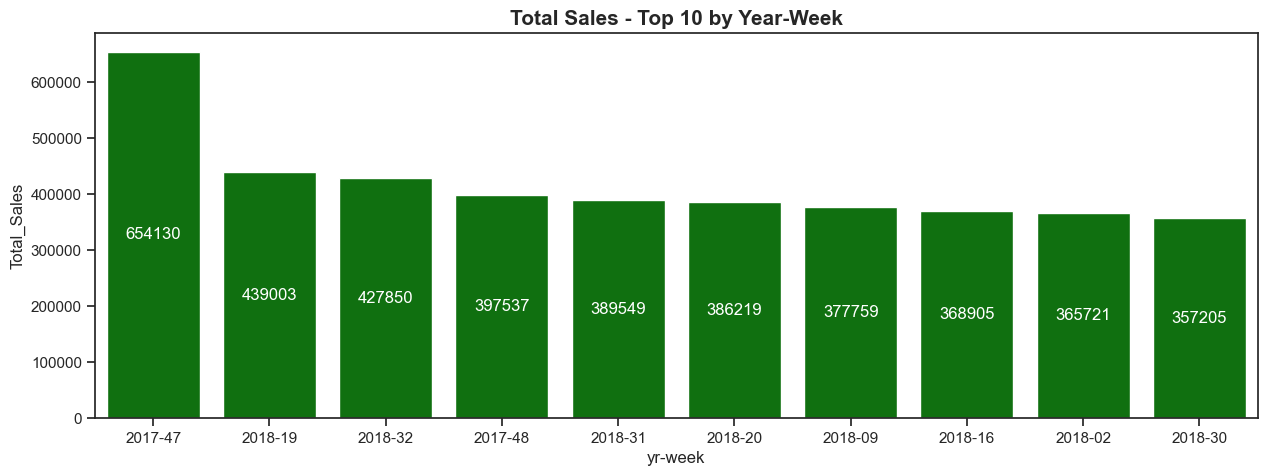

In [184]:
plt.figure(figsize=(15,5))
rvbar = sns.barplot(data = sales_week_top10, x='yr-week', y='Total_Sales', color='Green')
rvbar.bar_label(container=rvbar.containers[0], label_type='center', color='white')
plt.title('Total Sales - Top 10 by Year-Week', fontweight='bold',fontsize=15)
plt.ticklabel_format(style='plain',axis='y')
#plt.xticks(rotation=90)
plt.show()

In [185]:
## Sales by Year-Day
## creating new column as year-day
ecomm_df['yr-day'] = ecomm_df.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x, format= '%Y-%d'))
sales_day_top10 = ecomm_df.groupby('yr-day').payment_value.sum().reset_index().rename(columns={'payment_value':'Total_Sales'}).sort_values('Total_Sales', ascending=False).head(10)

In [186]:
sales_day_top10

,yr-day,Total_Sales
32,2017-24,454771.22
54,2018-15,440211.24
55,2018-16,422704.71
58,2018-19,420567.84
44,2018-05,405686.73
50,2018-11,402192.38
46,2018-07,399018.81
61,2018-22,389959.68
45,2018-06,387028.10
37,2017-29,384879.29


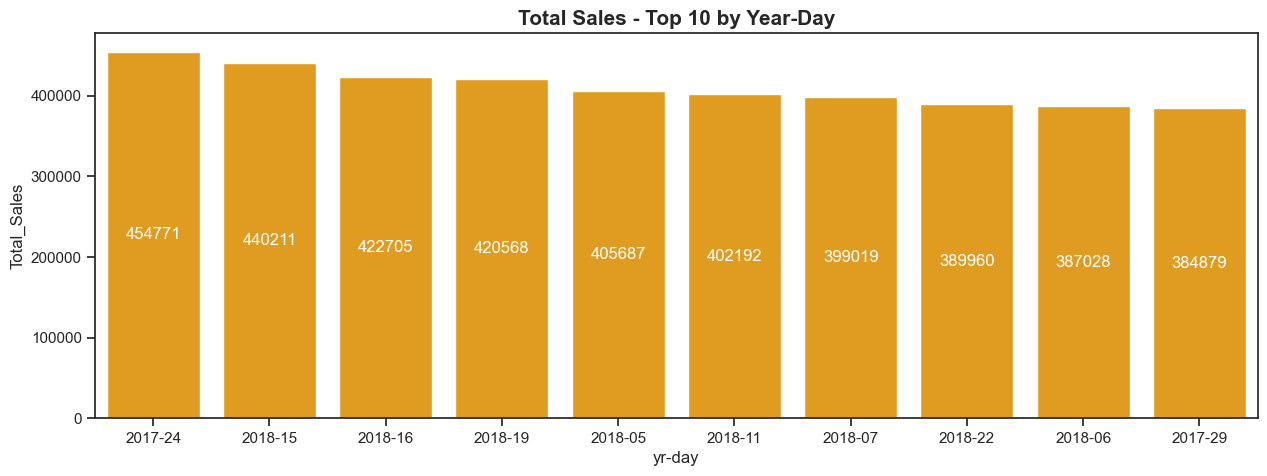

In [187]:
plt.figure(figsize=(15,5))
rvbar = sns.barplot(data = sales_day_top10, x='yr-day', y='Total_Sales', color='Orange')
rvbar.bar_label(container=rvbar.containers[0], label_type='center', color='white')
plt.title('Total Sales - Top 10 by Year-Day', fontweight='bold',fontsize=15)
plt.ticklabel_format(style='plain',axis='y')
#plt.xticks(rotation=90)
plt.show()

In [201]:
## Total Sales by Payment Method
sales_pmt_type = ecomm_df.groupby('payment_type').payment_value.sum()
sales_pmt_type

payment_type
UPI             3964071.44
credit_card    15265291.25
debit_card       247330.24
voucher          381160.63
Name: payment_value, dtype: float64

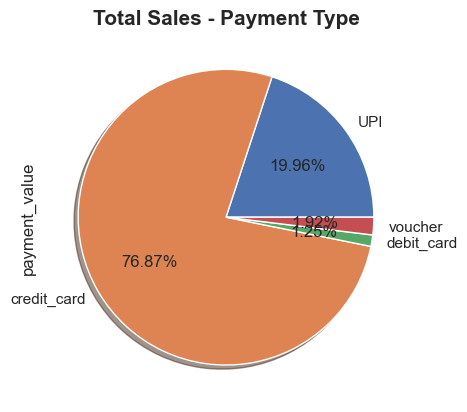

In [203]:
sales_pmt_type.plot(kind='pie', autopct='%1.2f%%', shadow=True)
plt.title('Total Sales - Payment Type', fontweight='bold',fontsize=15)
plt.show()

In [206]:
## Quantity by Category
ecomm_df.groupby('product_category_name').order_id.count().reset_index().rename(columns={'order_id':'Order_Quantity'})

,product_category_name,Order_Quantity
0,Agro_Industry_And_Commerce,243
1,Air_Conditioning,294
2,Art,207
3,Arts_And_Craftmanship,24
4,Audio,377
...,...,...
66,Stationery,2543
67,Tablets_Printing_Image,87
68,Telephony,4576
69,Toys,4171


In [209]:
## Quantity by location - State
qty_states = ecomm_df.groupby('customer_state').order_id.count().reset_index().rename(columns={'order_id':'Total_Orders'}).sort_values('Total_Orders', ascending=False)
qty_states

,customer_state,Total_Orders
0,Andhra Pradesh,70580
5,Gujarat,8650
2,Chhattisgarh,7249
9,Karnataka,4418
3,Delhi,3833
11,Madhya Pradesh,3302
6,Haryana,2576
16,Tamil Nadu,2419
12,Maharashtra,2279
8,Jammu & Kashmir,1789


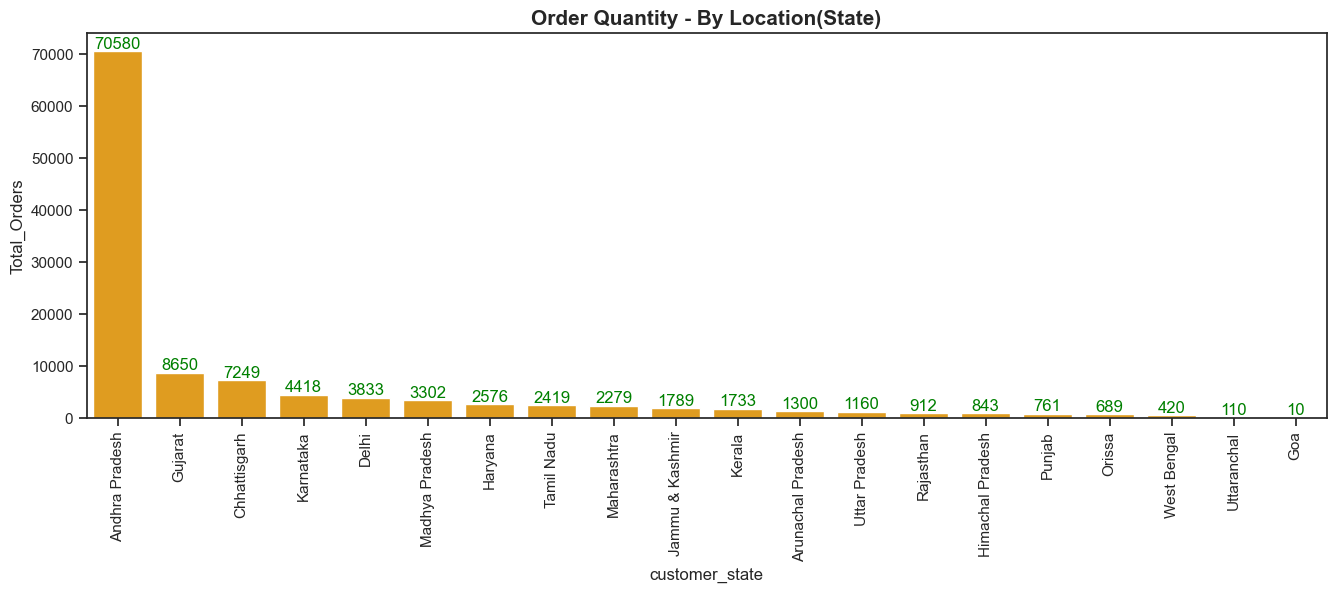

In [210]:
plt.figure(figsize=(16,5))
rvbar = sns.barplot(data = qty_states, x='customer_state', y='Total_Orders', color='Orange')
rvbar.bar_label(container=rvbar.containers[0], label_type='edge', color='Green')
plt.title('Order Quantity - By Location(State)', fontweight='bold',fontsize=15)
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.show()

In [214]:
## Quantity by location - City
qty_city=ecomm_df.groupby('customer_city').order_id.count().reset_index().rename(columns={'order_id':'Total_Orders'}).sort_values('Total_Orders', ascending=False)
qty_city

,customer_city,Total_Orders
55,Akkarampalle,18157
282,Badepalle,7956
148,Anantapur,3208
1091,Eddumailaram,2426
142,Anakapalle,1783
...,...,...
2437,Modak,1
639,Bisauli,1
3372,Satara,1
3373,Sathankulam,1


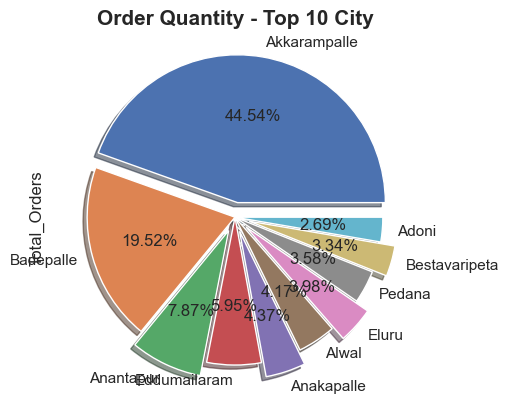

In [218]:
qty_city.head(10).set_index('customer_city').plot(kind='pie',y='Total_Orders' ,autopct='%1.2f%%', explode=[0.1,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.1,0.0], legend=False,shadow=True)
plt.title('Order Quantity - Top 10 City', fontweight='bold',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [220]:
## Quantity by Month
ecomm_df.groupby(by=['year','month']).order_id.count().reset_index().rename(columns={'order_id':'Order_Quantity'}).sort_values('Order_Quantity', ascending=False)

,year,month,Order_Quantity
12,2017,11,8842
14,2018,1,8375
16,2018,3,8344
17,2018,4,8087
18,2018,5,8062
15,2018,2,7842
21,2018,8,7321
19,2018,6,7269
20,2018,7,7197
13,2017,12,6452


In [223]:
## Quantity by Week
qty_week_top10 = ecomm_df.groupby('yr-week').order_id.count().reset_index().rename(columns={'order_id':'Quantity'}).sort_values('Quantity', ascending=False).head(10)
qty_week_top10

,yr-week,Quantity
49,2017-47,3589
50,2017-48,2445
73,2018-19,2329
85,2018-31,2320
86,2018-32,2263
63,2018-09,2187
74,2018-20,2172
87,2018-33,2091
62,2018-08,2056
72,2018-18,2053


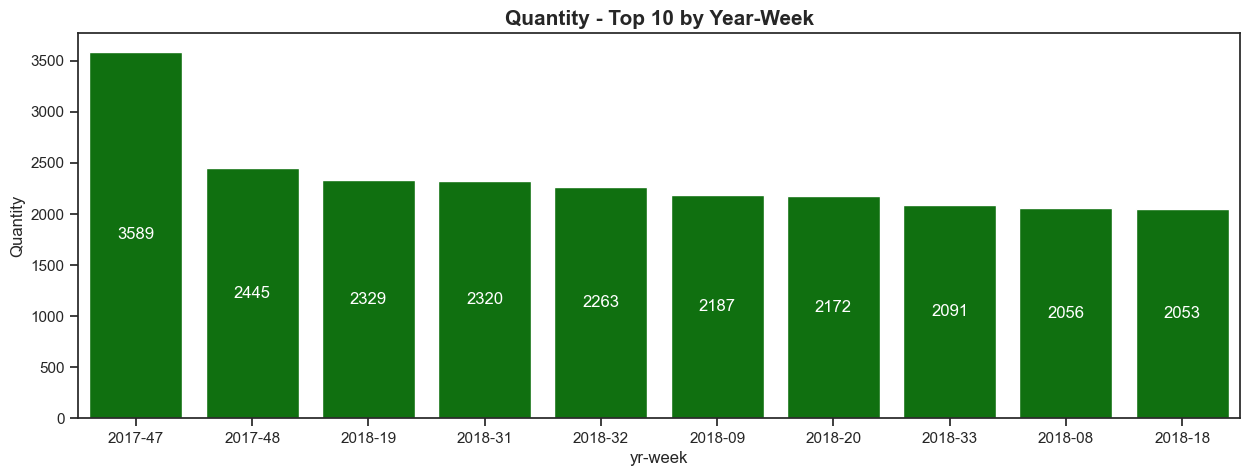

In [224]:
plt.figure(figsize=(15,5))
rvbar = sns.barplot(data = qty_week_top10, x='yr-week', y='Quantity', color='Green')
rvbar.bar_label(container=rvbar.containers[0], label_type='center', color='white')
plt.title('Quantity - Top 10 by Year-Week', fontweight='bold',fontsize=15)
plt.ticklabel_format(style='plain',axis='y')
#plt.xticks(rotation=90)
plt.show()

In [225]:
## Quantity by Year-Day
qty_day_top10 = ecomm_df.groupby('yr-day').order_id.count().reset_index().rename(columns={'order_id':'Quantity'}).sort_values('Quantity', ascending=False).head(10)
qty_day_top10

,yr-day,Quantity
32,2017-24,2706
55,2018-16,2485
54,2018-15,2394
58,2018-19,2262
57,2018-18,2225
41,2018-02,2221
53,2018-14,2207
47,2018-08,2205
43,2018-04,2201
46,2018-07,2199


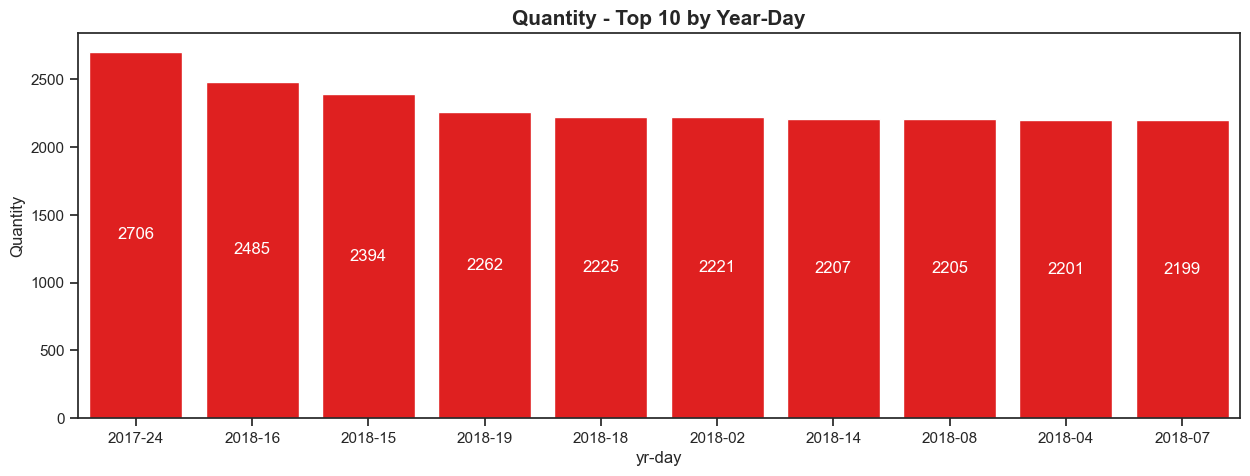

In [227]:
plt.figure(figsize=(15,5))
rvbar = sns.barplot(data = qty_day_top10, x='yr-day', y='Quantity', color='Red')
rvbar.bar_label(container=rvbar.containers[0], label_type='center', color='white')
plt.title('Quantity - Top 10 by Year-Day', fontweight='bold',fontsize=15)
plt.ticklabel_format(style='plain',axis='y')
#plt.xticks(rotation=90)
plt.show()

In [228]:
## Quantity by Payment Method
qty_pmt_type = ecomm_df.groupby('payment_type').order_id.count()
qty_pmt_type

payment_type
UPI            22490
credit_card    85357
debit_card      1661
voucher         5525
Name: order_id, dtype: int64

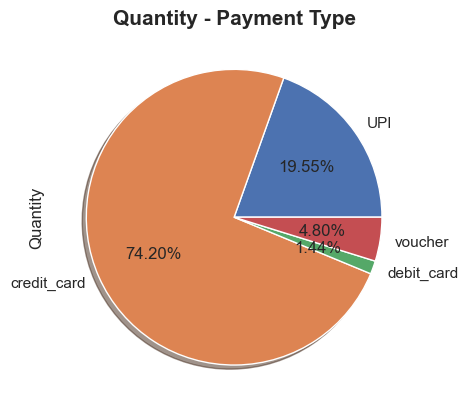

In [230]:
qty_pmt_type.plot(kind='pie', autopct='%1.2f%%', shadow=True)
plt.title('Quantity - Payment Type', fontweight='bold',fontsize=15)
plt.ylabel('Quantity')
plt.show()

In [232]:
ecomm_df.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,review_id,review_score,order_item_id,product_id,...,product_category_name,product_photos_qty,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,year,yr-week,yr-day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017,2017-40,2017-02
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,voucher,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017,2017-40,2017-02
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,voucher,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017,2017-40,2017-02
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,UPI,141.46,8d5266042046a06655c8db133d120ba5,4,1,595fac2a385ac33a80bd5114aec74eb8,...,Perfumery,1.0,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,7,2018,2018-30,2018-24


In [242]:
## f. Popular Products by month.
top_prod_month = ecomm_df[['month','year','product_id', 'order_id']].groupby(['month','year','product_id']).aggregate('count').reset_index()\
.sort_values(['year','month','order_id' ], ascending=[True,True, False]).drop_duplicates(subset=['month','year'])
top_prod_month

,month,year,product_id,order_id
50158,10,2016,eba7488e1c67729f045ab43fac426f2e,10
57511,12,2016,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1
125,1,2017,37eb69aca8718e843d897aa7b82f462d,15
5382,2,2017,a703f5ade6e4fae527357132230ea778,13
10382,3,2017,7e0dc102074f8285580c9777f79c90cf,44
16291,4,2017,99a4788cb24856965c36a24e339b6058,37
22566,5,2017,99a4788cb24856965c36a24e339b6058,66
28029,6,2017,42a2c92a0979a949ca4ea89ec5c7b934,71
35804,7,2017,f1c7f353075ce59d8a6f3cf58f419c9c,62
42729,8,2017,f1c7f353075ce59d8a6f3cf58f419c9c,53


In [254]:
## Popular product by Seller
ecomm_df[['seller_id','product_id','order_id']].groupby(['seller_id','product_id']).count().reset_index().sort_values('order_id', ascending=False).drop_duplicates('seller_id')

,seller_id,product_id,order_id
20566,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,527
9680,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,507
4571,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,505
21721,a1043bafd471dff536d0c462352beb48,d1c427060a0f73f6b889a5c7c61f2ac4,344
26143,cc419e0650a3c5ba77189a1882b7556a,154e7e31ebfa092203795c972e5804a6,287
...,...,...,...
5346,24a6daf925d9d591870a66660416de31,badc1560b96f07ebed649206bfa27e8d,1
5347,24c1de8d9551c0b4fbc53317d53efda8,d34984353fa530831479ab9686c090e7,1
5342,249f0e9905a6e06ad6c6bea7547ab9f6,19f1b5c58fd03aa8c41db25200829903,1
18189,82921991ff5b557b045605b8bbf08d49,b8073c83c3cd7f305f4c9c52a5cc9b96,1


In [255]:
## Popular product by State
ecomm_df[['customer_state','product_id','order_id']].groupby(['customer_state','product_id']).count().reset_index().sort_values('order_id', ascending=False).drop_duplicates('customer_state')

,customer_state,product_id,order_id
15953,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,340
35271,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,49
25899,Chhattisgarh,422879e10f46682990de24d770e7f83d,41
41594,Karnataka,422879e10f46682990de24d770e7f83d,25
46996,Madhya Pradesh,d1c427060a0f73f6b889a5c7c61f2ac4,25
30118,Delhi,53759a2ecddad2bb87a079a1f1519f73,24
40226,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
37393,Haryana,35afc973633aaeb6b877ff57b2793310,15
48412,Maharashtra,99a4788cb24856965c36a24e339b6058,13
52228,Tamil Nadu,b532349fe46b38fbc7bb3914c1bdae07,13


In [258]:
## Popular product by Category
ecomm_df[['product_category_name','product_id','order_id']].groupby(['product_category_name','product_id']).count().reset_index().sort_values('order_id', ascending=False).drop_duplicates('product_category_name')

,product_category_name,product_id,order_id
14421,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,527
5232,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,513
15619,Garden_Tools,422879e10f46682990de24d770e7f83d,505
8424,Computers_Accessories,d1c427060a0f73f6b889a5c7c61f2ac4,344
31348,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,325
...,...,...,...
258,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
22231,Music,4befae07dba4384f6d8237ad1e7f8294,4
11980,Fashion_Childrens_Clothes,57bdf3098169cccdb62221bd3e089cbd,3
21768,La_Cuisine,33900d427fa4bd3f509cdacda72e84a3,3


In [265]:
## g. Popular categories by state
pop_state=ecomm_df[['customer_state','product_category_name','order_id']].groupby(['customer_state','product_category_name']).count().reset_index()
pop_state.sort_values('order_id',ascending=False).drop_duplicates('customer_state')[['customer_state','product_category_name']].rename(columns={'customer_state':'State','product_category_name':'Popular_category'})

,State,Popular_category
7,Andhra Pradesh,Bed_Bath_Table
271,Gujarat,Bed_Bath_Table
132,Chhattisgarh,Bed_Bath_Table
503,Karnataka,Bed_Bath_Table
623,Madhya Pradesh,Bed_Bath_Table
198,Delhi,Bed_Bath_Table
338,Haryana,Bed_Bath_Table
898,Tamil Nadu,Bed_Bath_Table
689,Maharashtra,Bed_Bath_Table
446,Jammu & Kashmir,Bed_Bath_Table


In [268]:
## g. Popular categories by month
pop_month=ecomm_df[['month','year','product_category_name','order_id']].groupby(['month','year','product_category_name']).count().reset_index()
pop_month.sort_values(['year','month','order_id'],ascending=[True,True,False]).drop_duplicates(subset=['year','month'])[['year','month','product_category_name']].rename(columns={'product_category_name':'Popular_category'})

,year,month,Popular_category
1037,2016,10,Furniture_Decor
1178,2016,12,Fashion_Bags_Accessories
20,2017,1,Furniture_Decor
133,2017,2,Furniture_Decor
226,2017,3,Bed_Bath_Table
343,2017,4,Bed_Bath_Table
469,2017,5,Bed_Bath_Table
589,2017,6,Bed_Bath_Table
713,2017,7,Bed_Bath_Table
837,2017,8,Bed_Bath_Table


In [278]:
## h. List top 10 most expensive products sorted by price
ecomm_df.groupby('product_category_name').price.max().sort_values(ascending= False).reset_index().head(10)

,product_category_name,price
0,Housewares,6735.00
1,Computers,6729.00
2,Art,6499.00
3,Small_Appliances,4799.00
4,Musical_Instruments,4399.87
5,Consoles_Games,4099.99
6,Sports_Leisure,4059.00
7,Watches_Gifts,3999.90
8,Bed_Bath_Table,3980.00
9,Garden_Tools,3930.00


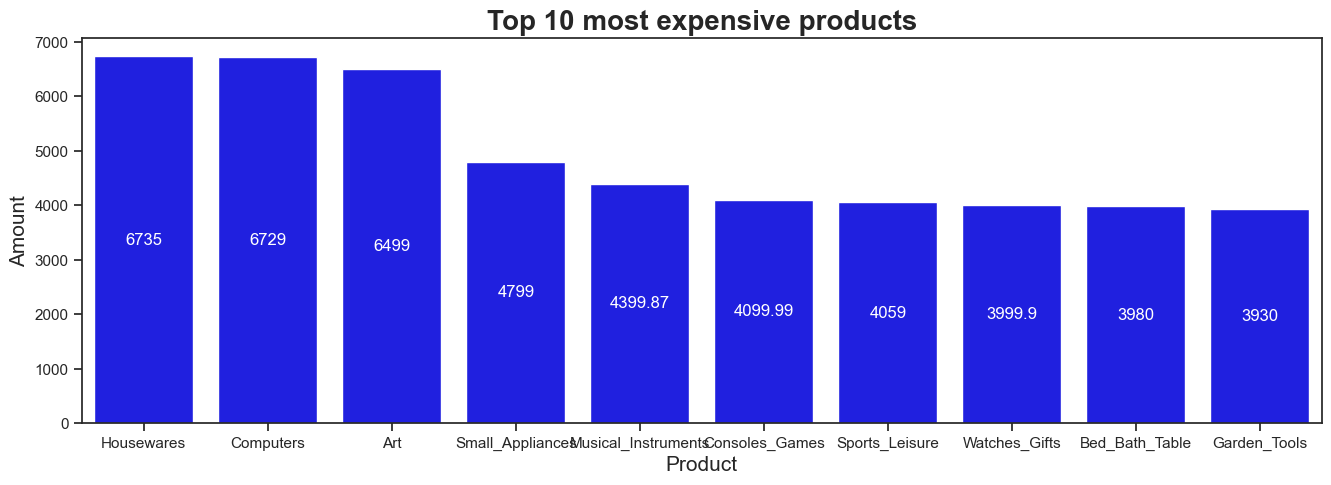

In [279]:
plt.figure(figsize=(16,5))
t10=sns.barplot(data=ecomm_df.groupby('product_category_name').price.max().sort_values(ascending= False).reset_index().head(10), x='product_category_name', y='price', color='blue' )
t10.bar_label(container=t10.containers[0], label_type='center', color='white')
plt.title('Top 10 most expensive products', fontweight='bold',fontsize=20)
plt.xlabel('Product',fontsize=15)
plt.ylabel('Amount',fontsize=15)
#plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
## 2. Performing Customers/sellers Segmentation

In [ ]:
## a. Divide the customers into groups based on the revenue generated 

In [284]:
cust_seg = ecomm_df.groupby(by='customer_unique_id').payment_value.sum().reset_index().rename(columns={'payment_value':'Total_Revenue'})

In [302]:
cust_seg.head()

,customer_unique_id,Total_Revenue
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [319]:
print(cust_seg.Total_Revenue.min())
print(cust_seg.Total_Revenue.max())
print(cust_seg.Total_Revenue.mean()) 

6.18
109312.64
212.74524121232898


In [326]:
## create new column as segment based on total_revenue
cust_seg['customer_segment']=pd.cut(cust_seg.Total_Revenue, bins=3, labels=['low','medium','high'],  include_lowest=True)

In [327]:
cust_seg.customer_segment.value_counts().reset_index()

,customer_segment,count
0,low,93337
1,medium,3
2,high,1


In [328]:
## b. Divide the sellers into groups based on the revenue generated 
seller_seg = ecomm_df.groupby('seller_id').price.sum().reset_index().rename(columns={'price':'Total_Revenue'})

In [329]:
seller_seg

,seller_id,Total_Revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,24655.93
2,002100f778ceb8431b7a1020ff7ab48f,1285.20
3,003554e2dce176b5555353e4f3555ac8,120.00
4,004c9cd9d87a3c30c522c48c4fc07416,22424.73
...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,1640.03
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,2140.80
2967,ffeee66ac5d5a62fe688b9d26f83f534,1839.86
2968,fffd5413c0700ac820c7069d66d98c89,8833.60


In [330]:
print(seller_seg.Total_Revenue.min())
print(seller_seg.Total_Revenue.max())
print(seller_seg.Total_Revenue.mean()) 

6.5
234847.73
4643.682794612794


In [337]:
seller_seg['seller_segment'] = pd.cut(seller_seg.Total_Revenue, bins=3, labels=['normal seller','average seller','good seller'], include_lowest=True)

In [338]:
seller_seg.seller_segment.value_counts().reset_index()

,seller_segment,count
0,normal seller,2950
1,average seller,13
2,good seller,7


In [ ]:
## 3. Cross-Selling (Which products are selling together)
## Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [342]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14


In [347]:
Orders = pd.merge(orders_df , order_items_df , how='left' , on='order_id' )
Orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:00,118.70,22.76


In [350]:
cross_selling = Orders[Orders.duplicated(['order_purchase_timestamp','customer_id'], keep=False)].sort_values(by='order_purchase_timestamp')[['customer_id','order_purchase_timestamp','product_id' ]]

In [351]:
cross_selling.head()

,customer_id,order_purchase_timestamp,product_id
34053,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:00,5a6b04657a4c5ee34285d1e4619a96b4
34052,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:00,5a6b04657a4c5ee34285d1e4619a96b4
34051,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:00,5a6b04657a4c5ee34285d1e4619a96b4
65388,aadd27185177fc7ac9b364898ac09343,2016-10-04 13:11:00,43bb8825dd6838251606e5e4130cfff4
65387,aadd27185177fc7ac9b364898ac09343,2016-10-04 13:11:00,43bb8825dd6838251606e5e4130cfff4


In [352]:
cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)

In [353]:
cross_selling

,customer_id,order_purchase_timestamp,product_id
34053,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:00,5a6b04657a4c5ee34285d1e4619a96b4
65388,aadd27185177fc7ac9b364898ac09343,2016-10-04 13:11:00,43bb8825dd6838251606e5e4130cfff4
70268,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,79938780eb7ffb7289f59a9a283bc06b
70269,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,8f1e43e0e3374ed8c84df748034d6179
45065,663c23427108785957931a3ac88f6085,2016-10-04 16:41:00,8adc1d29aa4fd4d758a91ef997c8a0a2
...,...,...,...
78166,22263f5c5d6ca2fe997157c56fdf05e8,2018-08-27 22:34:00,d6897f1dfdc99bbbdfda785158793d45
17617,930ae890c223dddbd81d9870d9701ec7,2018-08-28 19:31:00,9799f204443f39b914cb108eb13ef6e2
19174,49a6ae8a95c6a78d90945b983ab1ecfc,2018-08-28 19:32:00,7001d71d1ad858e07e5a341649412e76
20049,004440537b68545ca3c341d7279bc4c0,2018-08-28 22:30:00,44406b87e5ac6494cdb0c9dccd3b88d3


In [354]:
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],keep=False)].sort_values(by='order_purchase_timestamp').reset_index()

In [356]:
cross_selling.drop(columns = 'index',axis=1, inplace=True)

In [357]:
cross_selling

,customer_id,order_purchase_timestamp,product_id
0,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,79938780eb7ffb7289f59a9a283bc06b
1,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,8f1e43e0e3374ed8c84df748034d6179
2,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,dc82d7e8f99966cb4c641f7ea5590eaf
3,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,35bd74b6319ba18ae4f30d8b54144fd2
4,3f6f000d5b0a959f38481fad4ab7cac2,2016-10-04 23:59:00,48a12f318432c4b6a1fdfd5d79372e66
...,...,...,...
3522,72a366446dd3abfc90c598896714d85c,2018-08-26 11:02:00,e869c12a2f4763dbfc1a8398d20a1213
3523,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,df4bcf4a328103951507064660c445e9
3524,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,3af5874bd2429ed183a5445d1432fcde
3525,c24bbeb8111fea27eab791a37e665210,2018-08-27 12:39:00,b6b220a6c539cb65be34eed6fea8fe63


In [ ]:
## 4. Payment Behaviour
## a. How customers are paying?

In [368]:
payment_method = ecomm_df.payment_type.value_counts().reset_index()
payment_method

,payment_type,count
0,credit_card,85357
1,UPI,22490
2,voucher,5525
3,debit_card,1661


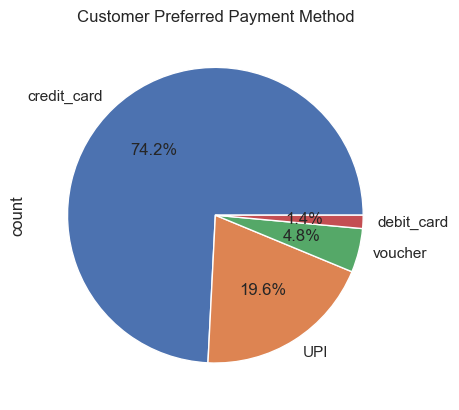

In [375]:
ecomm_df.payment_type.value_counts().plot(kind='pie', y= 'count', autopct='%1.1f%%')
plt.title('Customer Preferred Payment Method')
plt.show()

In [ ]:
## 5. Customer satisfaction towards category & product
## a. Which categories (top 10) are maximum rated & minimum rated?

In [377]:
print(ecomm_df.review_score.min())
print(ecomm_df.review_score.max())

1
5


In [381]:
ecomm_df.groupby('product_category_name').review_score.mean().sort_values(ascending=False).reset_index().head(10)

,product_category_name,review_score
0,Fashion_Childrens_Clothes,5.000000
1,Cds_Dvds_Musicals,4.642857
2,Books_Imported,4.525424
3,Books_General_Interest,4.494526
4,Small_Appliances_Home_Oven_And_Coffee,4.453333
5,Books_Technical,4.388060
6,Food_Drink,4.383513
7,Fashion_Sport,4.366667
8,Costruction_Tools_Tools,4.333333
9,Luggage_Accessories,4.325418


In [382]:
ecomm_df.groupby('product_category_name').review_score.mean().sort_values(ascending=True).reset_index().head(10)

,product_category_name,review_score
0,Security_And_Services,2.500000
1,Diapers_And_Hygiene,3.378378
2,Home_Comfort_2,3.387097
3,Office_Furniture,3.534897
4,Fashion_Male_Clothing,3.629630
5,Fixed_Telephony,3.744275
6,Audio,3.822281
7,Party_Supplies,3.860465
8,Furniture_Mattress_And_Upholstery,3.875000
9,Bed_Bath_Table,3.896464


In [ ]:
## b. Which products (top10) are maximum rated & minimum rated?

In [383]:
ecomm_df.groupby('product_id').review_score.mean().sort_values(ascending=False).reset_index().head(10)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,c876dad8e599989a907ee3b09c68966d,5.0
2,624763d3909ffa36098f91ce1e458ed4,5.0
3,624846a50026c57927e1156335b120f6,5.0
4,6249107c28285443c430b2663f3e49db,5.0
5,624a104988a613eba3eae6cd9132d397,5.0
6,624a71194ff2a5badf71b7870f88f24f,5.0
7,c8739aab0307635a23981f93dff12a9c,5.0
8,624dfd4e171c102a6b6f50a83e522019,5.0
9,625218e2e2b4668a47d08911e0def1a4,5.0


In [384]:
ecomm_df.groupby('product_id').review_score.mean().sort_values(ascending=True).reset_index().head(10)

,product_id,review_score
0,d979289e78afc0a6bee40e1f9dabe520,1.0
1,4ba2ecadbc22416fc5eab3097203922c,1.0
2,9b169f20f1b0ad0cd0d53d6d5f12e20f,1.0
3,ec8cad139523a58066a27ef934466932,1.0
4,21c080d8ac76a1d2b095d6353864a24f,1.0
5,ec8514b52ebb78103c68fddbb2d9f0a8,1.0
6,d068b5273f2823a2b01f34b7175c5e50,1.0
7,7fd93eccaf2d461cb6bc4bbd1aa91f1a,1.0
8,9adebd80969a5b8ec766fd02afffec2e,1.0
9,4bca3c346db930193289def4c4c14016,1.0


In [ ]:
## c. Average rating by location, seller, product, category, month etc.

In [385]:
ecomm_df.groupby('customer_state').review_score.mean().reset_index()

,customer_state,review_score
0,Andhra Pradesh,4.050439
1,Arunachal Pradesh,4.057692
2,Chhattisgarh,4.080839
3,Delhi,4.075920
4,Goa,4.800000
5,Gujarat,4.088671
6,Haryana,4.145575
7,Himachal Pradesh,4.026097
8,Jammu & Kashmir,4.047513
9,Karnataka,4.064735


In [386]:
ecomm_df.groupby('customer_city').review_score.mean().reset_index()

,customer_city,review_score
0,Aadityana,3.968750
1,Aambaliyasan,3.500000
2,Aantaliya,3.921569
3,Aarambhada,3.596154
4,Abiramam,5.000000
...,...,...
4080,Zamin Uthukuli,4.000000
4081,Ziauddin Pur,4.094937
4082,Zira,4.600000
4083,Zirakpur,4.500000


In [ ]:
Average rating by Seller

In [387]:
ecomm_df.groupby(ecomm_df.seller_id).review_score.mean().sort_values(ascending=False).reset_index().head(10)

,seller_id,review_score
0,94d76e96eedd976258cd3278ce56d5f2,5.0
1,8de8fe3af4449ed695d2434c933ed73e,5.0
2,31e60bf8d103ce47932a85f5562deb16,5.0
3,e1bed63d68ac36fe1f3061befe196af5,5.0
4,8cb7c5ddf41f4d506eba76e9a4702a25,5.0
5,e1c76f339ebd5460999f25a2aa8c92c5,5.0
6,3289d8c3eef4873f91ce0b1343c0dd58,5.0
7,8c9348f33ae3dada25c99c99ade2af78,5.0
8,3296662b1331dea51e744505065ae889,5.0
9,8c91bfea4263b8fba54081460693e2a1,5.0


In [388]:
## Average rating by Product

In [389]:
ecomm_df.groupby(ecomm_df.product_id).review_score.mean().sort_values(ascending=False).reset_index().head(10)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,c876dad8e599989a907ee3b09c68966d,5.0
2,624763d3909ffa36098f91ce1e458ed4,5.0
3,624846a50026c57927e1156335b120f6,5.0
4,6249107c28285443c430b2663f3e49db,5.0
5,624a104988a613eba3eae6cd9132d397,5.0
6,624a71194ff2a5badf71b7870f88f24f,5.0
7,c8739aab0307635a23981f93dff12a9c,5.0
8,624dfd4e171c102a6b6f50a83e522019,5.0
9,625218e2e2b4668a47d08911e0def1a4,5.0


In [390]:
## Average rating by Category

In [391]:
ecomm_df.groupby(ecomm_df.product_category_name).review_score.mean().sort_values(ascending=False).reset_index().head(10)

,product_category_name,review_score
0,Fashion_Childrens_Clothes,5.000000
1,Cds_Dvds_Musicals,4.642857
2,Books_Imported,4.525424
3,Books_General_Interest,4.494526
4,Small_Appliances_Home_Oven_And_Coffee,4.453333
5,Books_Technical,4.388060
6,Food_Drink,4.383513
7,Fashion_Sport,4.366667
8,Costruction_Tools_Tools,4.333333
9,Luggage_Accessories,4.325418


In [396]:
## Average rating by Month
ecomm_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,review_id,review_score,order_item_id,product_id,...,product_category_name,product_photos_qty,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,year,yr-week,yr-day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017,2017-40,2017-02
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,voucher,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017,2017-40,2017-02
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,voucher,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,...,Housewares,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017,2017-40,2017-02
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,UPI,141.46,8d5266042046a06655c8db133d120ba5,4,1,595fac2a385ac33a80bd5114aec74eb8,...,Perfumery,1.0,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,7,2018,2018-30,2018-24
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,credit_card,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,1,aa4383b373c6aca5d8797843e5594415,...,Auto,1.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,8,2018,2018-32,2018-08


In [403]:
ecomm_df.groupby(by=['month', 'year']).review_score.mean().reset_index().head(10)

,month,year,review_score
0,1,2017,4.181725
1,1,2018,3.979701
2,2,2017,4.163486
3,2,2018,3.767024
4,3,2017,4.117494
5,3,2018,3.731304
6,4,2017,4.092490
7,4,2018,4.101768
8,5,2017,4.184346
9,5,2018,4.149591


-- The End --